# Primena neuronskih mreža u prediktivnom održavanju kod vozila
## Link dataframe-a: https://www.kaggle.com/datasets/chavindudulaj/vehicle-maintenance-data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/vehicle_maintenance_data.csv")
df.head()

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Battery_Status,Need_Maintenance
0,Truck,58765,Good,0,4,Electric,Automatic,2000,28524,2023-11-23,2025-06-24,Second,20782,6,3,13.622204,New,New,Weak,1
1,Van,60353,Average,1,7,Electric,Automatic,2500,133630,2023-09-21,2025-06-04,Second,23489,7,0,13.625307,New,New,Weak,1
2,Bus,68072,Poor,0,2,Electric,Automatic,1500,34022,2023-06-27,2025-04-27,First,17979,7,0,14.306302,New,Good,Weak,1
3,Bus,60849,Average,4,5,Petrol,Automatic,2500,81636,2023-08-24,2025-11-05,Second,6220,7,3,18.709467,New,Worn Out,New,1
4,Bus,45742,Poor,5,1,Petrol,Manual,2000,97162,2023-05-25,2025-09-14,Third,16446,6,2,16.977482,Good,Good,Weak,1


In [ ]:
# Nesto vise o dataframe-u
df.describe()

,Mileage,Reported_Issues,Vehicle_Age,Engine_Size,Odometer_Reading,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Need_Maintenance
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,54931.232680,2.497420,5.492260,1556.292000,75551.187060,17465.340700,5.515560,1.50156,14.990323,0.809960
std,14401.912925,1.708781,2.875682,627.677218,43088.105658,7223.393401,2.874899,1.11951,2.885583,0.392336
min,30001.000000,0.000000,1.000000,800.000000,1001.000000,5000.000000,1.000000,0.00000,10.000098,0.000000
25%,42471.500000,1.000000,3.000000,1000.000000,38009.000000,11189.750000,3.000000,0.00000,12.489037,1.000000
50%,54810.000000,2.000000,5.000000,1500.000000,75598.500000,17477.500000,6.000000,2.00000,14.986352,1.000000
75%,67391.500000,4.000000,8.000000,2000.000000,112999.500000,23692.000000,8.000000,3.00000,17.474676,1.000000
max,80000.000000,5.000000,10.000000,2500.000000,149999.000000,30000.000000,10.000000,3.00000,19.999968,1.000000


In [ ]:
# Informacije o kolonama (cilj nam je da pretvorimo sve nenumericke vrednosti u numericke kako bi treniranje bilo uspesno)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Vehicle_Model         50000 non-null  object 
 1   Mileage               50000 non-null  int64  
 2   Maintenance_History   50000 non-null  object 
 3   Reported_Issues       50000 non-null  int64  
 4   Vehicle_Age           50000 non-null  int64  
 5   Fuel_Type             50000 non-null  object 
 6   Transmission_Type     50000 non-null  object 
 7   Engine_Size           50000 non-null  int64  
 8   Odometer_Reading      50000 non-null  int64  
 9   Last_Service_Date     50000 non-null  object 
 10  Warranty_Expiry_Date  50000 non-null  object 
 11  Owner_Type            50000 non-null  object 
 12  Insurance_Premium     50000 non-null  int64  
 13  Service_History       50000 non-null  int64  
 14  Accident_History      50000 non-null  int64  
 15  Fuel_Efficiency    

In [ ]:
# Proveramo da li imamo duplikate
df.isnull().sum().sort_values(ascending=False)

Vehicle_Model           0
Mileage                 0
Battery_Status          0
Brake_Condition         0
Tire_Condition          0
Fuel_Efficiency         0
Accident_History        0
Service_History         0
Insurance_Premium       0
Owner_Type              0
Warranty_Expiry_Date    0
Last_Service_Date       0
Odometer_Reading        0
Engine_Size             0
Transmission_Type       0
Fuel_Type               0
Vehicle_Age             0
Reported_Issues         0
Maintenance_History     0
Need_Maintenance        0
dtype: int64

In [ ]:
# Proveravamo target kolonu
df["Need_Maintenance"].value_counts()

Need_Maintenance
1    40498
0     9502
Name: count, dtype: int64

In [ ]:
# Proveravamo ostale (nenumericke) kolone
df["Vehicle_Model"].value_counts()

Vehicle_Model
Bus           8414
Van           8400
SUV           8360
Truck         8328
Motorcycle    8295
Car           8203
Name: count, dtype: int64

In [ ]:
df["Maintenance_History"].value_counts()

Maintenance_History
Average    16724
Good       16712
Poor       16564
Name: count, dtype: int64

In [ ]:
df["Fuel_Type"].value_counts()

Fuel_Type
Diesel      16738
Petrol      16680
Electric    16582
Name: count, dtype: int64

In [ ]:
df["Transmission_Type"].value_counts()

Transmission_Type
Manual       25009
Automatic    24991
Name: count, dtype: int64

In [ ]:
df["Owner_Type"].value_counts()

Owner_Type
Second    16875
Third     16630
First     16495
Name: count, dtype: int64

In [ ]:
df["Tire_Condition"].value_counts()

Tire_Condition
New         16825
Worn Out    16622
Good        16553
Name: count, dtype: int64

In [ ]:
df["Brake_Condition"].value_counts()

Brake_Condition
Worn Out    16685
New         16668
Good        16647
Name: count, dtype: int64

In [ ]:
df["Battery_Status"].value_counts()

Battery_Status
New     16725
Good    16657
Weak    16618
Name: count, dtype: int64

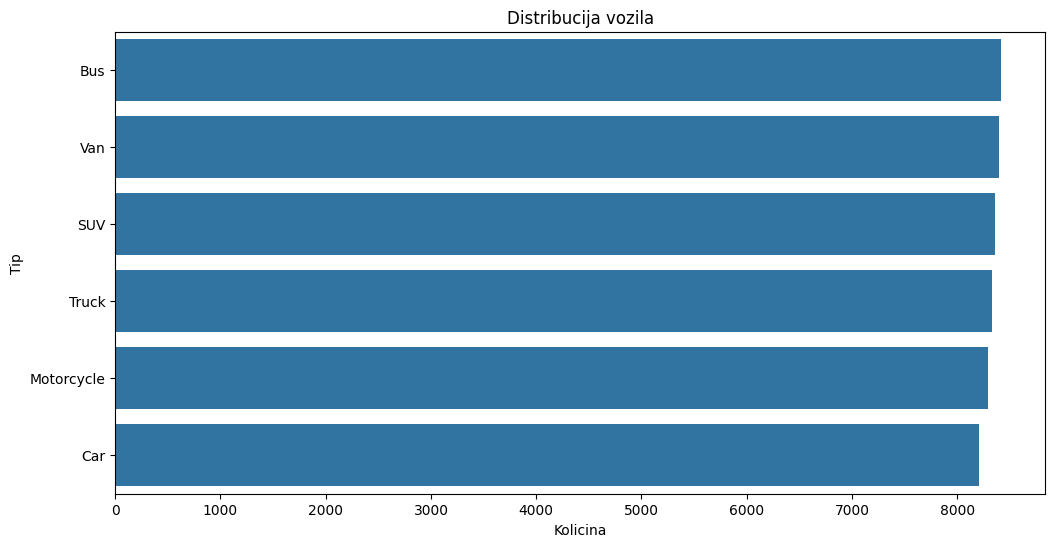

In [ ]:
# Plot koji pokazuje kolicinu podataka o vozilima po tipu
plt.figure(figsize=(12, 6))
sns.countplot(y='Vehicle_Model', data=df, order=df['Vehicle_Model'].value_counts().index)
plt.title('Distribucija vozila')
plt.xlabel('Kolicina')
plt.ylabel('Tip')
plt.show()

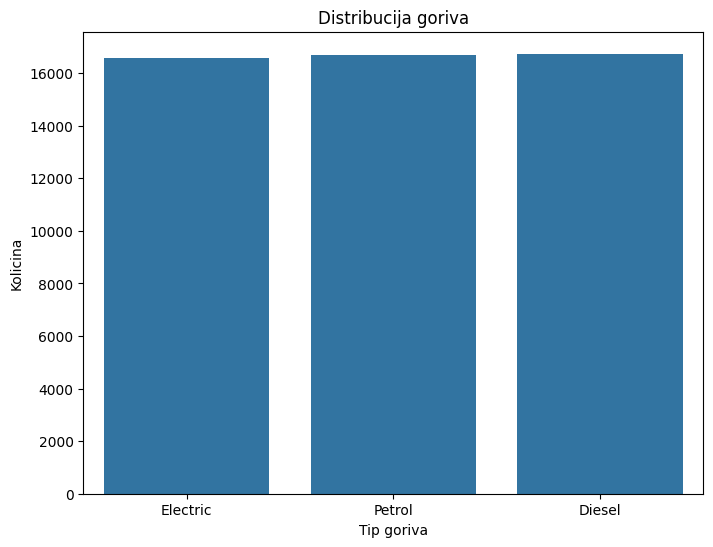

In [ ]:
# Plot koji pokazuje kolicinu podataka po tipu goriva
plt.figure(figsize=(8, 6))
sns.countplot(x='Fuel_Type', data=df)
plt.title('Distribucija goriva')
plt.xlabel('Tip goriva')
plt.ylabel('Kolicina')
plt.show()

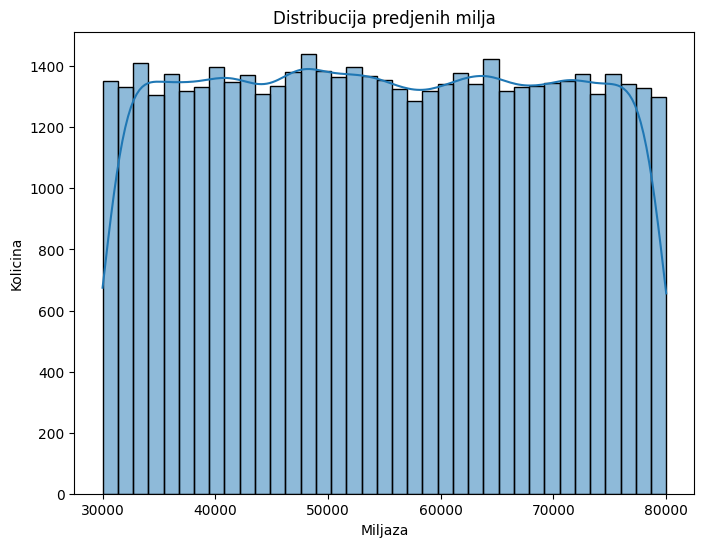

In [ ]:
# Plot koji pokazuje kolicinu vozila koji su presli neku miljazu
plt.figure(figsize=(8, 6))
sns.histplot(df['Mileage'], kde=True)
plt.title('Distribucija predjenih milja')
plt.xlabel('Miljaza')
plt.ylabel('Kolicina')
plt.show()

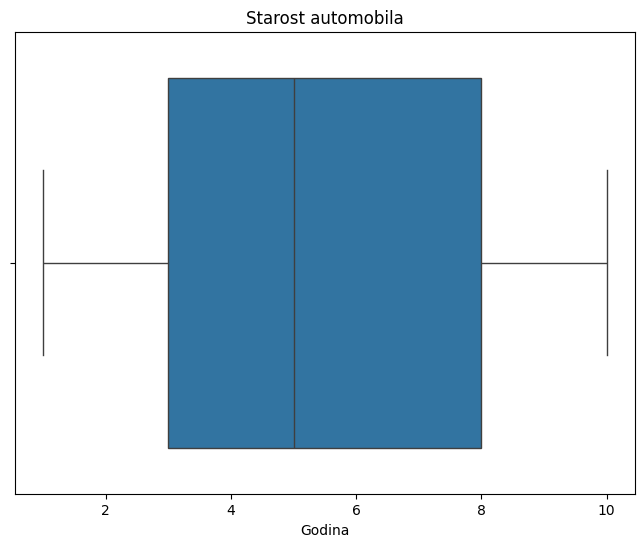

In [ ]:
# Plot o starosti vozila
plt.figure(figsize=(8, 6))
sns.boxplot(x='Vehicle_Age', data=df)
plt.title('Starost automobila')
plt.xlabel('Godina')
plt.show()

In [ ]:
# Pretvaramo sve nenumericke vrednosti u numericke (0 i 1) vrednosti kao posebne kolone (na neke dodajemo prefix i suffix zbog lakseg prepoznavanja)
# Dok stare nenumericke kolone brisemo
df = df.join(pd.get_dummies(df.Vehicle_Model).astype(int))
df = df.join(pd.get_dummies(df.Maintenance_History).astype(int).add_prefix('MH_'))
df = df.join(pd.get_dummies(df.Fuel_Type).astype(int).add_prefix("Fuel_"))
df = df.join(pd.get_dummies(df.Transmission_Type).astype(int).add_prefix("Trans_"))
df = df.join(pd.get_dummies(df.Owner_Type).astype(int).add_suffix("_Owner"))
df = df.join(pd.get_dummies(df.Tire_Condition).astype(int).add_suffix("_Tire"))
df = df.join(pd.get_dummies(df.Battery_Status).astype(int).add_suffix("_Battery"))
df = df.join(pd.get_dummies(df.Brake_Condition).astype(int).add_suffix("_Brake"))
df = df.drop(columns=["Vehicle_Model", "Maintenance_History", "Fuel_Type", "Transmission_Type", "Owner_Type", "Tire_Condition", "Battery_Status", "Brake_Condition"])
df.rename(columns={'Worn Out_Tire': 'Worn_Out_Tire'}, inplace=True)
df.head()

,Mileage,Reported_Issues,Vehicle_Age,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Insurance_Premium,Service_History,Accident_History,...,Third_Owner,Good_Tire,New_Tire,Worn_Out_Tire,Good_Battery,New_Battery,Weak_Battery,Good_Brake,New_Brake,Worn Out_Brake
0,58765,0,4,2000,28524,2023-11-23,2025-06-24,20782,6,3,...,0,0,1,0,0,0,1,0,1,0
1,60353,1,7,2500,133630,2023-09-21,2025-06-04,23489,7,0,...,0,0,1,0,0,0,1,0,1,0
2,68072,0,2,1500,34022,2023-06-27,2025-04-27,17979,7,0,...,0,0,1,0,0,0,1,1,0,0
3,60849,4,5,2500,81636,2023-08-24,2025-11-05,6220,7,3,...,0,0,1,0,0,1,0,0,0,1
4,45742,5,1,2000,97162,2023-05-25,2025-09-14,16446,6,2,...,1,1,0,0,0,0,1,1,0,0


In [ ]:
# Jedini preostali nenumericki podaci su nam datumi koji ih sa type object pretvaramo u datetime
df['Last_Service_Date'] = pd.to_datetime(df['Last_Service_Date'])
df['Warranty_Expiry_Date'] = pd.to_datetime(df['Warranty_Expiry_Date'])

In [ ]:
# Import-ujemo datetime
from datetime import datetime

# Uzimamo trenutno vreme
today = pd.Timestamp.now()

# Pravimo novu kolonu koja oduzima trenutno vreme odnosno danasnji datum sa datumom kada je radjen poslednji servis (kako bi dobili razliku u danima (kao numericki podatak))
df['Days_Since_Last_Service'] = (today - df['Last_Service_Date']).dt.days

# Pravimo novu kolonu koja oduzima datum isteka garancije sa trenutno vreme odnosno danasnji datum (kako bi dobili razliku u danima (kao numericki podatak))
df['Days_Until_Warranty_Expire'] = (df['Warranty_Expiry_Date'] - today).dt.days

# Brisemo prethodne kolone
df = df.drop("Last_Service_Date", axis=1)
df = df.drop("Warranty_Expiry_Date", axis=1)
df.head()

,Mileage,Reported_Issues,Vehicle_Age,Engine_Size,Odometer_Reading,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Need_Maintenance,...,New_Tire,Worn_Out_Tire,Good_Battery,New_Battery,Weak_Battery,Good_Brake,New_Brake,Worn Out_Brake,Days_Since_Last_Service,Days_Until_Warranty_Expire
0,58765,0,4,2000,28524,20782,6,3,13.622204,1,...,1,0,0,0,1,0,1,0,177,401
1,60353,1,7,2500,133630,23489,7,0,13.625307,1,...,1,0,0,0,1,0,1,0,240,381
2,68072,0,2,1500,34022,17979,7,0,14.306302,1,...,1,0,0,0,1,1,0,0,326,343
3,60849,4,5,2500,81636,6220,7,3,18.709467,1,...,1,0,0,1,0,0,0,1,268,535
4,45742,5,1,2000,97162,16446,6,2,16.977482,1,...,0,0,0,0,1,1,0,0,359,483


In [ ]:
# Proveravamo trenutno stanje dataframe-a
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Mileage                     50000 non-null  int64  
 1   Reported_Issues             50000 non-null  int64  
 2   Vehicle_Age                 50000 non-null  int64  
 3   Engine_Size                 50000 non-null  int64  
 4   Odometer_Reading            50000 non-null  int64  
 5   Insurance_Premium           50000 non-null  int64  
 6   Service_History             50000 non-null  int64  
 7   Accident_History            50000 non-null  int64  
 8   Fuel_Efficiency             50000 non-null  float64
 9   Need_Maintenance            50000 non-null  int64  
 10  Bus                         50000 non-null  int64  
 11  Car                         50000 non-null  int64  
 12  Motorcycle                  50000 non-null  int64  
 13  SUV                         500

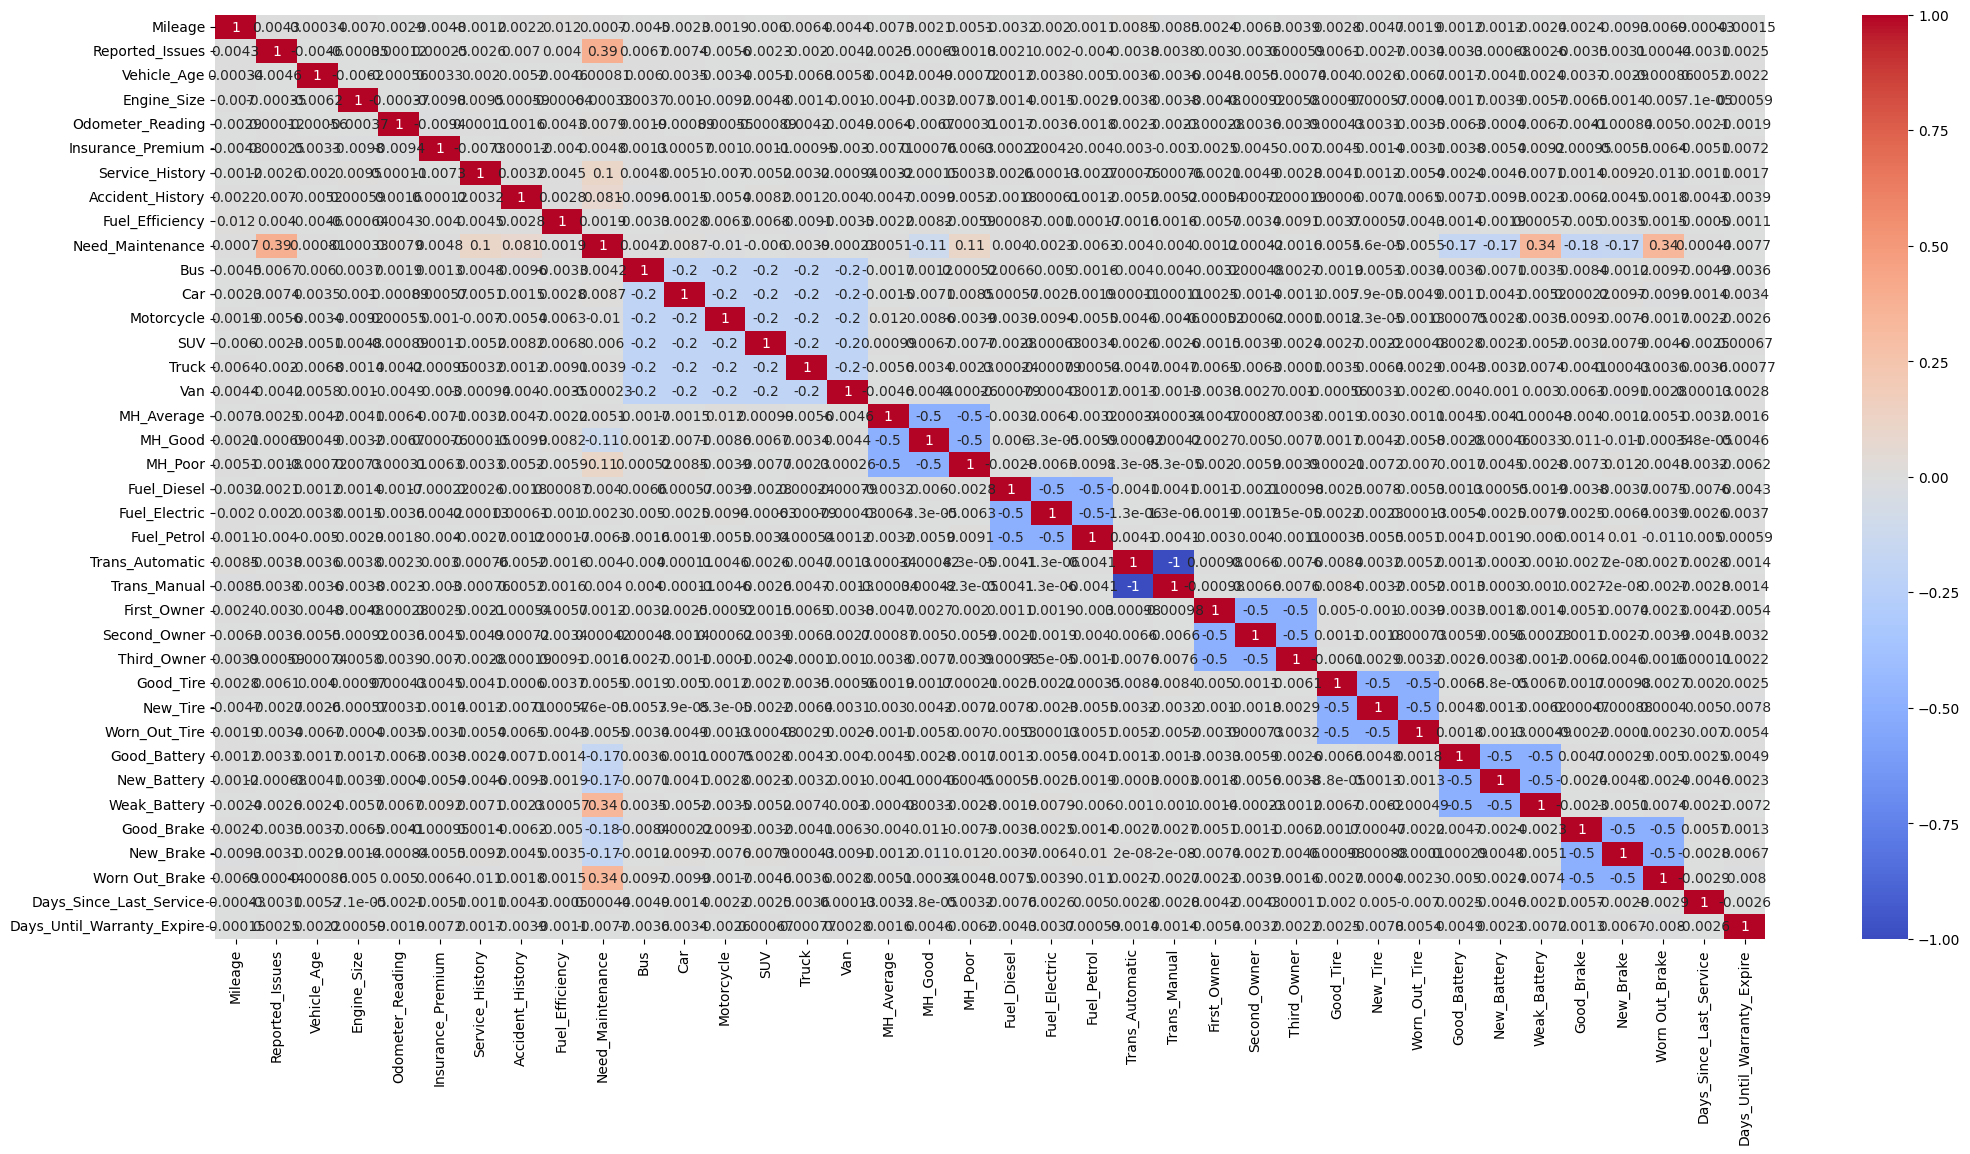

In [ ]:
# Posto smo sve sveli sada na numericke podatke, sada preko heatmap-e gledamo korelacije izmedju kolona
plt.figure(figsize=(25, 12))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
# Posto imamo dosta kolona i nemoguce je izdvojiti puno toga, uzecemo kolone samo one koje najvise uticu na promene vrednosti target kolone (Need_Maintenance)
# Stavljamo apsolutnu vrednost iz razloga zato sto nas ne zanima da li neka vrednost pozitivno ili negativno utice, vec nam je bitno samo da utice, dok za ostale koje su mnogo blizi nuli, ignorisemo (jer ne uticu na promenu target kolone)
target_correlations = df.corr()["Need_Maintenance"].apply(abs).sort_values()
target_correlations

New_Tire                      0.000046
Van                           0.000227
Engine_Size                   0.000326
Second_Owner                  0.000423
Days_Since_Last_Service       0.000435
Mileage                       0.000704
Vehicle_Age                   0.000806
First_Owner                   0.001161
Third_Owner                   0.001583
Fuel_Efficiency               0.001874
Fuel_Electric                 0.002300
Truck                         0.003920
Fuel_Diesel                   0.003985
Trans_Manual                  0.004049
Trans_Automatic               0.004049
Bus                           0.004224
Insurance_Premium             0.004775
MH_Average                    0.005103
Good_Tire                     0.005496
Worn_Out_Tire                 0.005536
SUV                           0.006047
Fuel_Petrol                   0.006285
Days_Until_Warranty_Expire    0.007658
Odometer_Reading              0.007876
Car                           0.008658
Motorcycle               

In [ ]:
# Uzimamo poslednjih 21 kolona (target kolonu + 20 kolona koje najvise uticu na promenu vrednosti target kolone)
selected_features = target_correlations[-21:].index

In [ ]:
# Pretvaramo ih u listu
selected_features = list(selected_features)

In [ ]:
# Prikaz 21 izdvojenih kolona
selected_features

['MH_Average',
 'Good_Tire',
 'Worn_Out_Tire',
 'SUV',
 'Fuel_Petrol',
 'Days_Until_Warranty_Expire',
 'Odometer_Reading',
 'Car',
 'Motorcycle',
 'Accident_History',
 'Service_History',
 'MH_Poor',
 'MH_Good',
 'New_Brake',
 'Good_Battery',
 'New_Battery',
 'Good_Brake',
 'Weak_Battery',
 'Worn Out_Brake',
 'Reported_Issues',
 'Need_Maintenance']

In [ ]:
# Uzimamo "skraceni" dataframe sa 21 kolona
limited_df = df[selected_features]

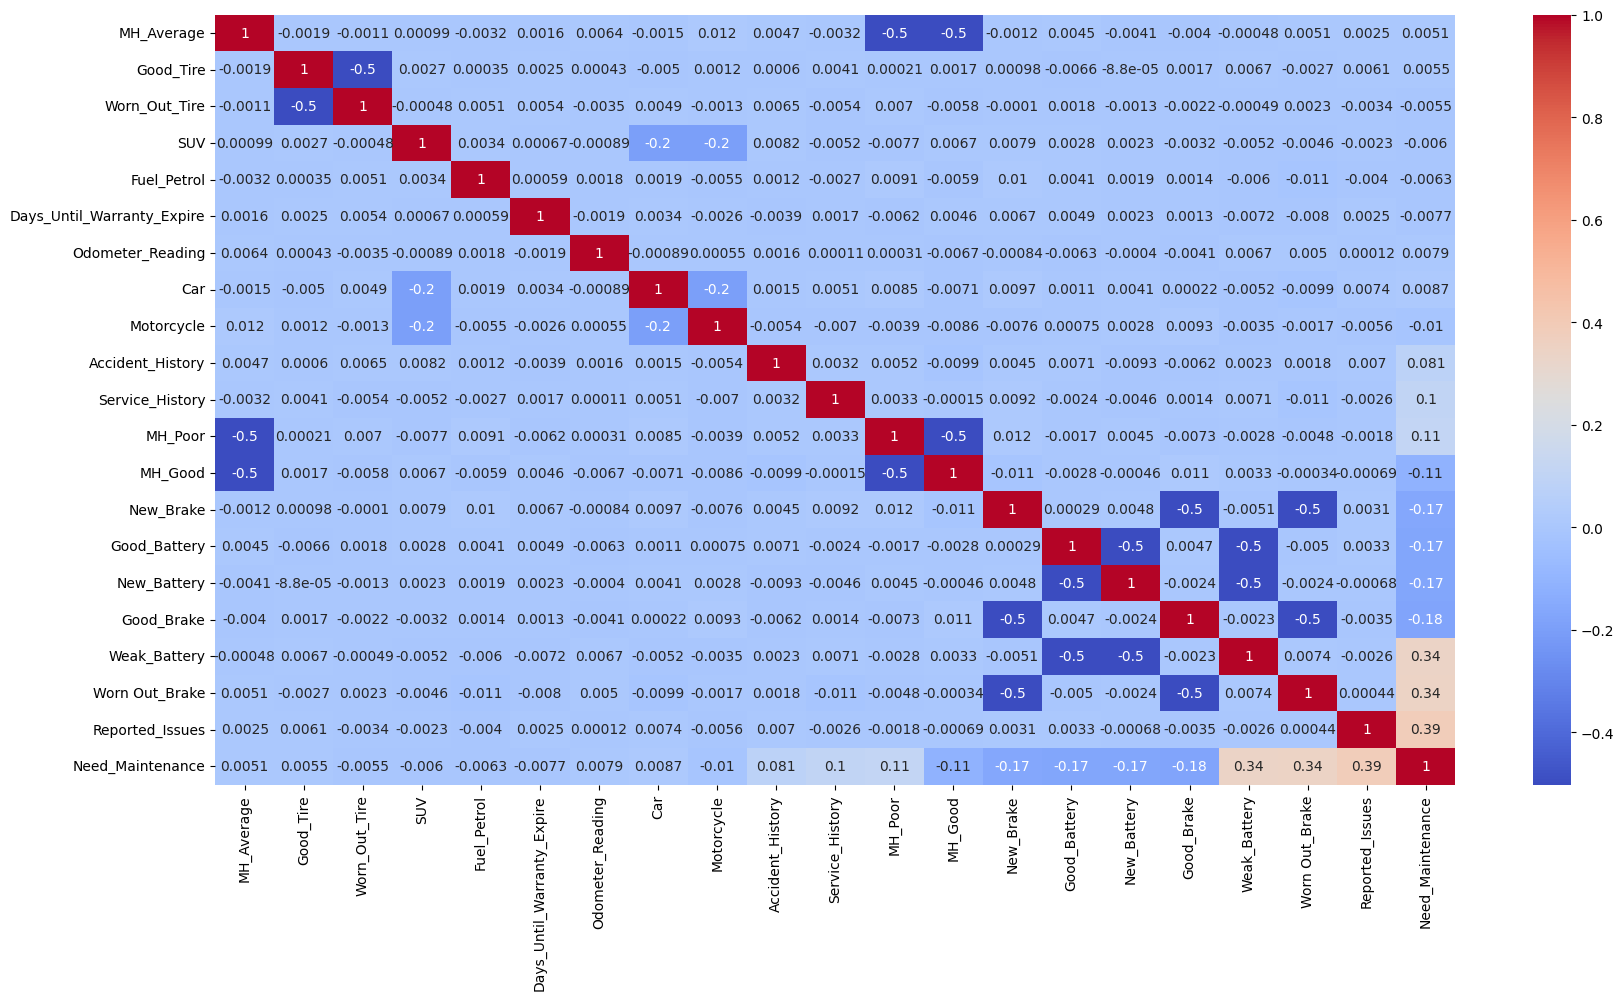

In [ ]:
# Sada opet prikazujemo heatmap sa manjim vrednostima kako bi bolje videli korelacije
# Nas zanima samo korelacije sa target kolonom (Need_Maintenance)
# Mozemo primetiti da su najpozitivnije vrednosti: Reported_Issues, Worn_Out_Brake, Weak_Battery
# Dok sa druge strane najnegativnije vrednosti su: Good_Brake, New_Battery, Good_Battery, New_Brake
# Sto ima smisla jer ako imamo dosta prijavljenih kvarova, istrosene kocnice i lose baterije, onda nam je potrebno odrzavanje vozila (ide ka vrednosti 1)
# Dok sa druge strane ako imamo dobre kocnice, nove baterije, dobre baterije, nove kocnice, onda nama nije potrebno odrzavanje vozila (ide ka vrednosti 0)
plt.figure(figsize=(20, 10))
sns.heatmap(limited_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Import-ujemo potrebne datoteke za pravljenje samog modela
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Izdvajamo X, y gde nam je X -> sve kolone osim "Need_Maintenance", y -> samo kolona "Need_Maintenance"
X, y = limited_df.drop("Need_Maintenance", axis=1), limited_df["Need_Maintenance"]

# 20% podataka koristimo za testiranje dok cemo preostalih 80% koristiti za treniranje
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skaliramo X_train i X_test za bolje rezultate
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Definisemo model neuronske mreze
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [ ]:
# Kompajliramo model (koristimo binarnu klasifikaciju jer nam je target kolona "Need_Maintenance" binarna (ima vrednosti 0 i 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Treniramo model kroz 100 epoha
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)

# Prikaz tacnosti i gubitka
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

Epoch 1/100
1000/1000 [==============================] - 4s 3ms/step - loss: 0.1018 - accuracy: 0.9589 - val_loss: 0.0342 - val_accuracy: 0.9860
Epoch 2/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0238 - accuracy: 0.9897 - val_loss: 0.0227 - val_accuracy: 0.9883
Epoch 3/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0159 - accuracy: 0.9926 - val_loss: 0.0161 - val_accuracy: 0.9929
Epoch 4/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0064 - accuracy: 0.9985 - val_loss: 0.0043 - val_accuracy: 0.9999
Epoch 5/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 6/100
1000/1000 [==============================] - 2s 2ms/step - loss: 9.3194e-04 - accuracy: 1.0000 - val_loss: 9.4778e-04 - val_accuracy: 1.0000
Epoch 7/100
1000/1000 [==============================] - 2s 2ms/step - loss: 3.9705e-04 - accuracy: 1.0000 - val_loss: 5.6

In [ ]:
# Funkcija koja prikazuje plot koji prikazuje gubitke
def plot_loss(history):
  plt.plot(history.history["loss"], label="loss")
  plt.plot(history.history["val_loss"], label="val_loss")
  plt.xlabel("Epoch")
  plt.ylabel("Binary crossentropy")
  plt.legend()
  plt.grid(True)
  plt.show()

# Funkcija koja prikazuje plot koji prikazuje preciznost
def plot_accuracy(history):
  plt.plot(history.history["accuracy"], label="accuracy")
  plt.plot(history.history["val_accuracy"], label="val_accuracy")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.grid(True)
  plt.show()

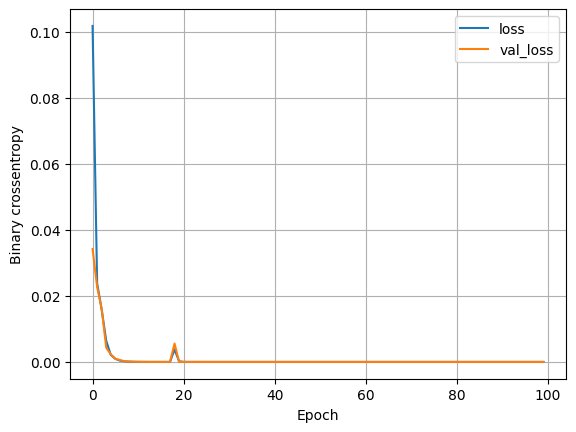

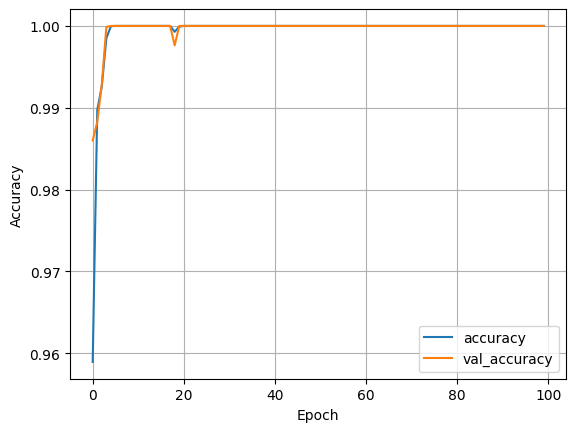

In [ ]:
# Prikazujemo plotove iz kojemo mozemo da vidimo vrednosti gubitka i preciznosti kroz epohe
# Citajuci podatke sa plot-a mozemo da vidimo da su nam gubici skoro jednaki nuli, dok je preciznost na 100% -> sto cini ovim modelom veoma uspesnim
plot_loss(history)
plot_accuracy(history)

In [ ]:
# Predikcija
y_pred = model.predict(X_test_scaled)
y_pred_class = (y_pred > 0.5).astype("int32")

# Uzimamo trenirane kolone
feature_names = X_train.columns

# Uzimamo jedan test
X_new = pd.DataFrame([X_test.iloc[0]], columns=feature_names)

# Skaliramo test
X_new_scaled = scaler.transform(X_new)

# Pravimo predikciju
predicted_value = model.predict(X_new_scaled)
predicted_class = (predicted_value > 0.5).astype("int32")
actual_value = y_test.iloc[0]

# Prikazivanje
print("Prediktivna vrednost:", predicted_class[0][0])
print("Prava vrednost:", actual_value)

1/1 [==============================] - 0s 22ms/step
Prediktivna vrednost: 1
Prava vrednost: 1


In [ ]:
# Mozemo videti da imamo vise primera za vozila kojima treba odrzavanje (iz tog razloga cemo uglavnom imati vrednost 1 kao rezultat)
df["Need_Maintenance"].value_counts()

Need_Maintenance
1    40498
0     9502
Name: count, dtype: int64

In [ ]:
# Zato cemo proci kroz 100 testa kako bi bolje prikazali efikasnost modela
num_examples = 100

# Uzimamo praznu listu
results = []

for i in range(num_examples):
    # Uzimamo jedan test
    X_new = pd.DataFrame([X_test.iloc[i]], columns=feature_names)

    # Skaliramo taj test
    X_new_scaled = scaler.transform(X_new)

    # Pravimo predikciju
    predicted_value = model.predict(X_new_scaled)
    predicted_class = (predicted_value > 0.5).astype("int32")
    actual_value = y_test.iloc[i]

    # Pridruzujemo test listi
    results.append({"Index": i, "Prediktivna vrednost": predicted_class[0][0], "Prava vrednost": actual_value})

# Konvertiramo listu u Dataframe
results_df = pd.DataFrame(results)

# Prikazujemo rezultate
print(results_df)

1/1 [==============================] - 0s 22ms/step
    Index  Prediktivna vrednost  Prava vrednost
0       0                     1               1
1       1                     1               1
2       2                     0               0
3       3                     1               1
4       4                     1               1
..    ...                   ...             ...
95     95                     1               1
96     96                     1               1
97     97                     1               1
98     98                     0               0
99     99                     1               1

[100 rows x 3 columns]


In [ ]:
# Sada mozemo videti i neke primere sa 0
# Kraj